### LC sim by given time stamps

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 10-30-20
<br>**Short description:** Develope a function to simulate light curves by a specific series of input time stamps. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
from math import ceil
%matplotlib inline

# use mpl style on github
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
            '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)

In [3]:
from agntk.carma.CARMATerm import *
from agntk.lc.carma import *
from celerite import GP

## gpSimByT
Inputs:
- t: timestamps to downsample the light curves

Returns:
- t: Timestamps
- y: Light curve values at each provided timestamp
- yerr: uncertainty associated with each y value

In [4]:
def downsample_byT(tIn, tOut):
    """Downsample a light curve given the output timestamps"""
    return np.array(list(map(lambda x: (np.abs(tIn-x)).argmin(), tOut)))
    

In [34]:
def gpSimByTT(carmaTerm, SNR, t, factor=10, nLC=1):

    gp_sim = GP(carmaTerm)

    # get number points in full LC based on desired cadence
    duration = ceil(t[-1] - t[0])
    N = 10*ceil(duration/np.median(t[1:] - t[:-1]))

    # simulate full LC
    tFull, yFull, yerrFull = gpSimFull(carmaTerm, SNR, duration, N = N, nLC=nLC)

    # downsample by desired output cadence
    t_expand = np.repeat(t[None, :], nLC, axis=0)
    tOut_idx = np.array(list(map(downsample_byT, tFull, t_expand)))
    tOut = np.array(list(map(lambda x, y: x[y], tFull, tOut_idx)))
    yOut = np.array(list(map(lambda x, y: x[y], yFull, tOut_idx)))
    yerrOut = np.array(list(map(lambda x, y: x[y], yerrFull, tOut_idx)))
    
    return tOut, yOut, yerrOut

### Test with DRW

In [35]:
# define a term
term = DRW_term(np.log(0.3), np.log(150))

# simulate LC
tSmall = np.sort(np.random.uniform(0, 1000, 1000))
t, y, yerr = gpSimByTT(term, 20, tSmall, nLC=2)

Text(0.5, 1.0, 'Simulated DRW LC \\#1')

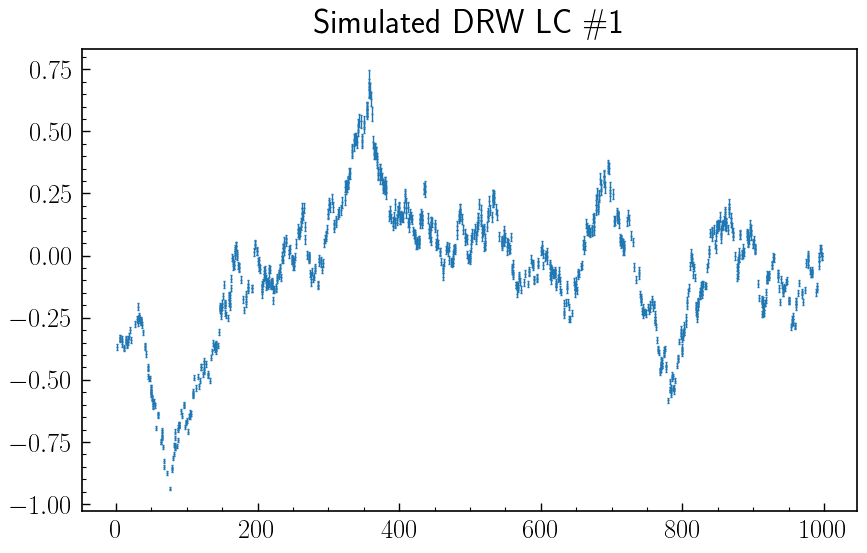

In [36]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(t[0], y[0], yerr[0], fmt='.', markersize=1, linewidth=1, capsize=1)
plt.title('Simulated DRW LC \#1')

Text(0.5, 1.0, 'Simulated DRW LC \\#2')

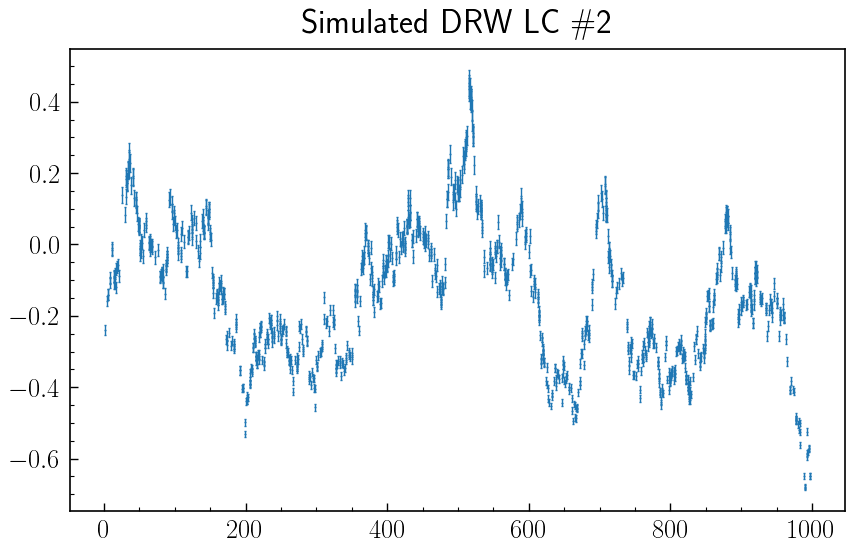

In [37]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(t[1], y[1], yerr[1], fmt='.', markersize=1, linewidth=1, capsize=1)
plt.title('Simulated DRW LC \#2')

### Try DHO

In [38]:

# define GP model
a1 = 0.03939692
a2 = 0.00027941
b0 = 0.0046724
b1 = 0.0256982
DHO_kernel = DHO_term(np.log(a1), np.log(a2), np.log(b0), np.log(b1))
t, y, yerr = gpSimByTT(DHO_kernel, 15, tSmall, nLC=2)

Text(0.5, 1.0, 'Simulated DHO LC \\#1')

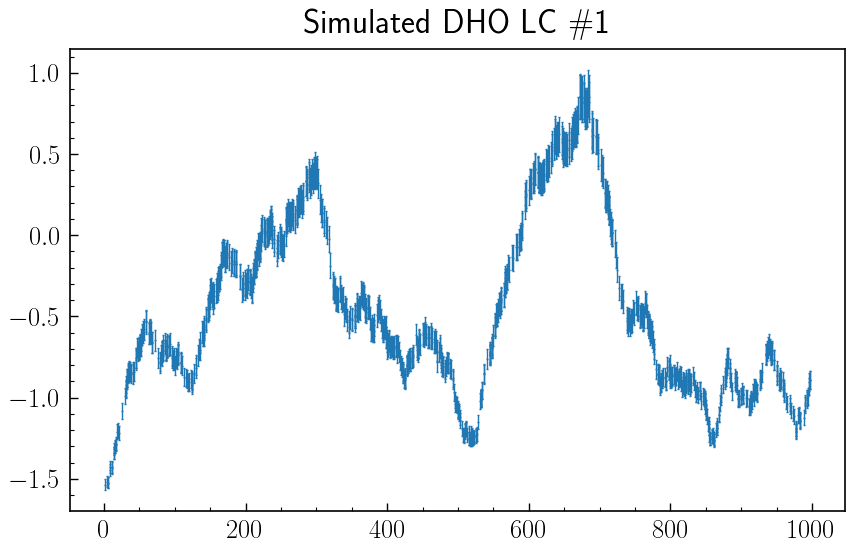

In [39]:
# # plot simulated LC
fig = plt.figure(figsize=(10,6))
plt.errorbar(t[0], y[0], yerr[0], fmt='.', markersize=1, linewidth=1, capsize=1)
plt.title('Simulated DHO LC \#1')

Text(0.5, 1.0, 'Simulated DHO LC \\#2')

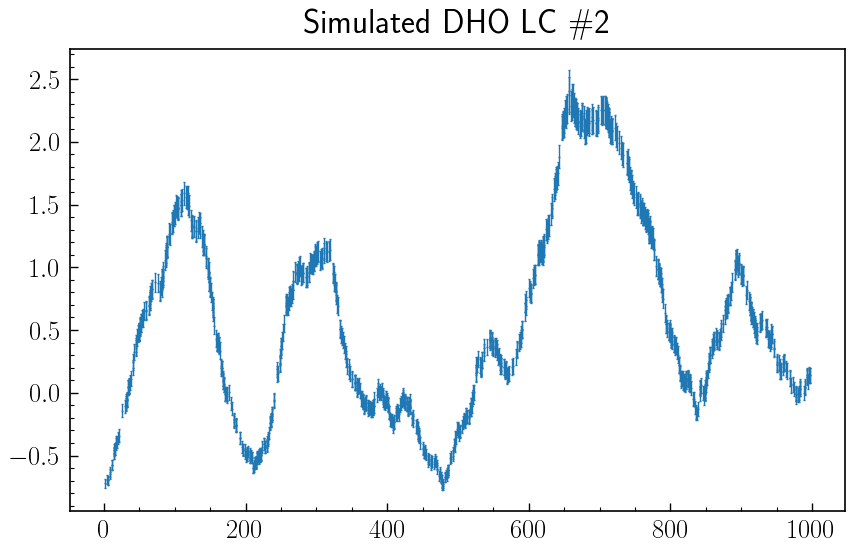

In [40]:
 # plot simulated LC
fig = plt.figure(figsize=(10,6))
plt.errorbar(t[1], y[1], yerr[1], fmt='.', markersize=1, linewidth=1, capsize=1)
plt.title('Simulated DHO LC \#2')

### Try CARMA(3,0)

In [44]:
carma30b = CARMA_term(np.log([3, 3.2, 1.2]), np.log([1]))
tLarge = np.sort(np.random.uniform(0, 1000, 5000))
t, y, yerr = gpSimByTT(carma30b, 20, tLarge)

Text(0.5, 1.0, 'Simulated CARMA(3,0) LC')

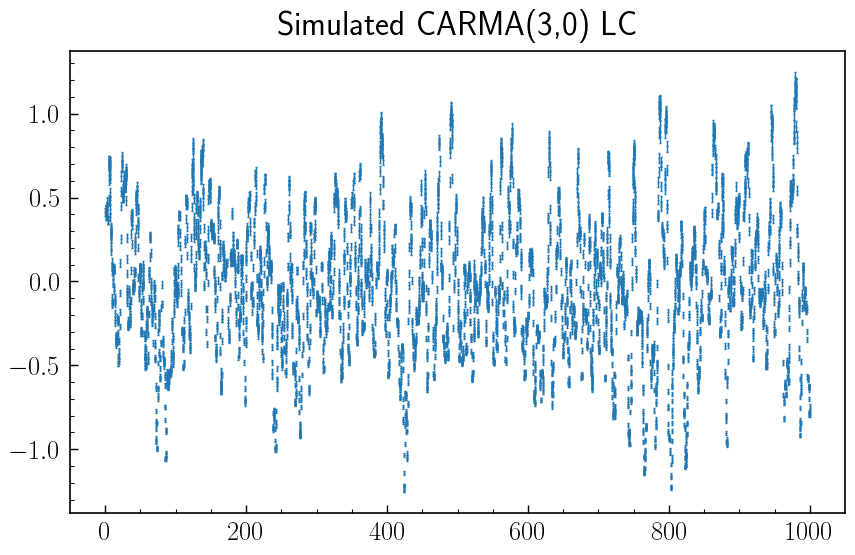

In [45]:
# plot simulated LC
fig = plt.figure(figsize=(10,6))
plt.errorbar(t[0], y[0], yerr[0], fmt='.', markersize=1, linewidth=1, capsize=1)
plt.title('Simulated CARMA(3,0) LC')

__NOTE:__ $\texttt{celerite}$ can't simulate higher-order processes that has data points too close to each other, maybe on the scale of 1e-5, which sort of makes sense given we always have limited numerical precision.